## Driven, damped, pendulum
* Period doubling route to chaos
* Poincare sections



Note: The notation and graphs in this notebook parallel those in <em>Chaotic Dynamics</em>
by Baker and Gollub.  (There's a copy in the department office.)

For the driven, damped, pendulum, Newton's second law gives

$$ \frac{d^2\theta}{dt^2} =  -\omega_0^2\sin \theta -\gamma \frac{d\theta}{dt}
   + A\cos(\omega_d t), $$

where $\omega_0$ is the natural frequency of the low-amplitude, undamped, and undriven pendulum, 
and $\omega_d$ is the frequency of the drive.  Using dimensionless variables in which time is 
measured in units of $\omega_0^{-1}$, i.e., $t^\prime = \omega_0 t$,
this equation reduces to 

$$ \frac{d^2\theta}{d{t^\prime}^2} =  -\sin \theta - b \frac{d\theta}{dt^\prime}
   + g\cos(\omega_d^\prime t^\prime), $$
   
where $b\equiv \gamma/\omega_0 $, $\omega_d^\prime \equiv \omega_d/\omega_0$, and $g \equiv A/\omega_0^2$.  In these units the 
period is $2\pi$.  (This is essentially the parametrization of Baker and Gollub.) From this point on I will drop the primes, but retain the understanding that 
these are nondimensional quantities.

Before doing the numerical integration I will break the second-order equation of motion up into two coupled first-order equations:

\begin{eqnarray*}
\frac{d\theta}{dt} &=& \omega \\
\frac{d\omega}{dt} &=&  - b\omega -\sin\theta+ g\cos(\omega_d t)
\end{eqnarray*}

These equations will be entered in the function `eqs()` below.

Marty Ligare, August 2020

In [2]:
import numpy as np
from scipy import integrate

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# Following sets up LateX fonts
#mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#mpl.rc('text', usetex=True)

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

#### Differential Equations

In [4]:
# Function returning derivatives of the dependent quantities u[0] 
# and  u[1], or more physically in this case, theta and omega.
def eqs(u,t,b,c,om_d):
    th = u[0]
    om = u[1]
    return (om,-np.sin(th) - b*om + c*np.cos(om_d*t))

### Example of period doubling 
See Golub and Baker Fig. 3.4b

#### Parameters

These parameters result in period doubling; see graphs below.

In [5]:
th0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([th0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
g = 1.07        # Driving amplitude
om_d = 2./3     # Driving frequency

#### Pick times for output, and solve DEs:
Note: `odeint` returns an array:

  `[[th_0  om_0],  
 [th_1  om_1],
 [th_2  om_2], ... ]`

To get single list for `th` and single list for `om` we need the 
transpose of the returned array.  (Could also keep return as a 
single array if that's more useful down the road.)


In [6]:
# NOTE: The time points t selected for the output are not the 
# points used for the numerical evalution.
t = np.linspace(0,50*2.*np.pi,50*201)

th, om = integrate.odeint(eqs,u0,t,args=(b,g,om_d)).T

<IPython.core.display.Javascript object>


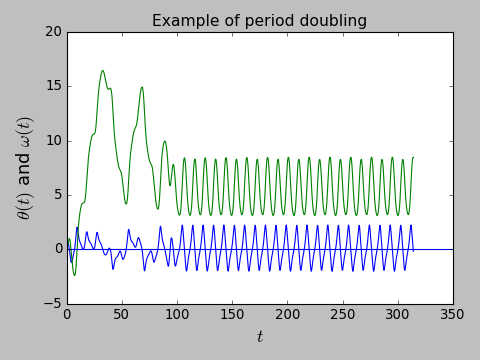

In [7]:
plt.figure(1)
plt.plot(t,om)
plt.plot(t,th)
plt.axhline(0)
plt.title("Example of period doubling",fontsize=14)
plt.xlabel("$t$")
plt.ylabel("$\\theta(t)$ and $\omega(t)$"); # No idea why I need \\theta


<IPython.core.display.Javascript object>


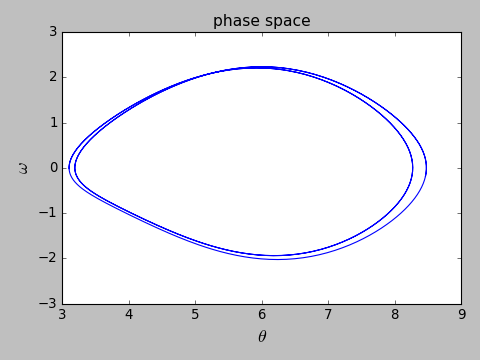

In [8]:
plt.figure(2)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 9000
plt.plot(th[tplot:],om[tplot:]);

### Example of chaos
Same parameters as above, except for drive amplitude $g$.<br>
See Golub and Baker Fig. 3.4c

In [9]:
th0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([th0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
g = 1.15        # Driving amplitude
om_d = 2./3     # Driving frequency

t = np.linspace(0,50*2.*np.pi,50*201)  # NOTE: The  points selected 
                                       # for plotting are not the 
                                       # points used for the numerical evalution.
th, om = integrate.odeint(eqs,u0,t,args=(b,g,om_d)).T

<IPython.core.display.Javascript object>


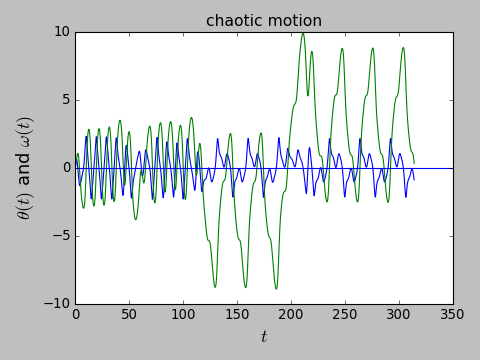

In [10]:
plt.figure(3)
plt.plot(t,om)
plt.plot(t,th)
plt.axhline(0)
plt.title("chaotic motion",fontsize=14)
plt.xlabel("$t$")
plt.ylabel("$\\theta(t)$ and $\omega(t)$"); # No idea why I need \\theta

<IPython.core.display.Javascript object>


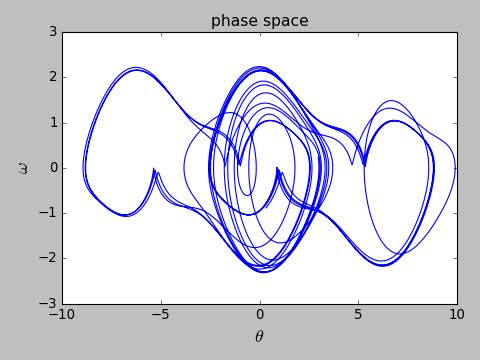

In [11]:
plt.figure(4)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 1000
plt.plot(th[tplot:],om[tplot:]);

### Poincare Section

Simply choose points for output of numerical integration (in the 'linspace()' function) 
that are integer multiples of the drive period:

$$ t_n  = n\ \frac{2\pi}{\omega_d}.   $$

In [12]:
th0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([th0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
g = 1.15        # Driving amplitude
om_d = 2./3     # Driving frequency
t_d = 2*np.pi/om_d

t = np.linspace(0,1000*t_d, 1001)      # NOTE: The  points selected 
                                       # for plotting are not the 
                                       # points used for the numerical evalution.
th, om = integrate.odeint(eqs,u0,t,args=(b,g,om_d)).T

<IPython.core.display.Javascript object>


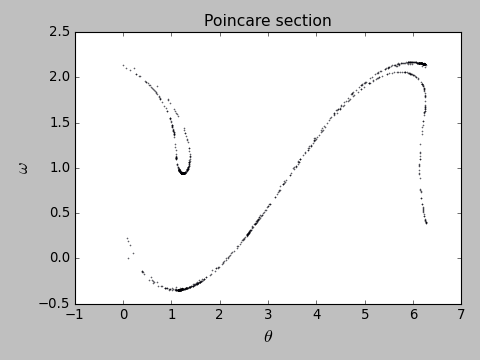

In [13]:

plt.figure(5)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("Poincare section",fontsize=14)
plt.scatter(th%(2*np.pi),om,s=0.1);

#### Version Information

`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [14]:
%load_ext version_information

In [15]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
scipy 1.5.2
matplotlib 3.3.0
Fri Aug 07 15:27:53 2020 EDT